# Using GraphiPy to extract data from Twitter

In [1]:
from graphipy.graphipy import GraphiPy

In [2]:
# create GraphiPy object (default to Pandas)
graphipy = GraphiPy()

# Creating the Twitter Object
GraphiPy's Pinterest object needs ACCESS_TOKEN in order to connect to Pinterest's API:

To get ACCESS_TOKEN, you can login to Pinterest and go to https://developers.pinterest.com/apps/ and click the "create app" button at the upper right corner of the page, or you can get it using Postman.

In [3]:
# The pinterest API needs access token
ACCESS_TOKEN = 'AjFMoyvq2Jd6XcR376o_h_zBs47eFWd8yKPNGpFFW-yQrkBflAvtgDAAAaRkRVvsxELgUQwAAAAA'
pinterest_api = {
    "access_token": ACCESS_TOKEN
}

In [4]:
# create the pinterest object
pinterest = graphipy.get_pinterest(pinterest_api)

# Search a board by board_url
### def fetch_pinterest_board_by_url(graph, board_url)

Types of node returned:

- board - the board returned by searching for board url
- user - the creator of the board returned
- pin - pins on the board returned

Types of edges returned:

- CREATED_BY
- CREATED
- HAS
- ON

In [5]:
board_url = "nichola_wilkin/python"

# Every function call modifies the graph that is sent as input
# single_board_graph = graphipy.create_graph()
# twitter.etch_pinterest_board_by_url(single_board_graph, board_url)

# However, it also returns the graph modified so you can assign it to other variables like so:
single_board_graph = pinterest.fetch_pinterest_board_by_url(graphipy.create_graph(), board_url)

In [6]:
# To get the list of available nodes
print(single_board_graph.get_nodes().keys())

dict_keys(['board', 'user', 'pin'])


In [7]:
# You can get the dataframe from Pandas by specifying the node, for example: board
single_board_df = single_board_graph.get_df("board")
single_board_df.head()

,_id,Label,label_attribute,name,url,image_url,created_at,privacy,pins_count,collaborators_count,followers_count,description
0,774689642091047952,Python,board,Python,https://www.pinterest.com/nichola_wilkin/python/,https://i.pinimg.com/60x60/35/5e/4e/355e4eb8c5...,2018-04-21T16:45:39,public,94,0,1694,


In [8]:
# show the attributes of this node
single_board_df.iloc[0]

_id                                                   774689642091047952
Label                                                             Python
label_attribute                                                    board
name                                                              Python
url                     https://www.pinterest.com/nichola_wilkin/python/
image_url              https://i.pinimg.com/60x60/35/5e/4e/355e4eb8c5...
created_at                                           2018-04-21T16:45:39
privacy                                                           public
pins_count                                                            94
collaborators_count                                                    0
followers_count                                                     1694
description                                                             
Name: 0, dtype: object

In [9]:
# To get the list of available edges
print(single_board_graph.get_edges().keys())

dict_keys(['created_by', 'created', 'has', 'on'])


In [10]:
# You can also get the dataframe from Pandas by specifying the edge, for example: created_by
single_board_created_by_edge_df = single_board_graph.get_df("created_by", "edge")
single_board_created_by_edge_df.head()

,Source,Target,Label,label_attribute,_id
0,774689642091047952,774689710810358609,CREATED_BY,CREATED_BY,774689642091047952774689710810358609CREATED_BY


# Search a pin by pin id
### def fetch_pinterest_pin_by_id(graph, pin_id)

Types of node returned:

- pin - the pin returned by searching for pin id
- user - the creator of the pin returned
- board - the board the pin returned on

Types of edge returned:

- CREATED_BY
- CREATED
- ON
- HAS


In [11]:
# You can use pin id to retrieve information of a single pin
pin_id = "429249408218081265"
single_pin_graph = pinterest.fetch_pinterest_pin_by_id(graphipy.create_graph(), pin_id)

In [12]:
# Get all the node dataframes available from the query
single_pin_graph_nodes = single_pin_graph.get_nodes()

# Find out list of available nodes
print(single_pin_graph_nodes.keys())

dict_keys(['pin', 'user', 'board'])


In [13]:
single_pin_graph_nodes["pin"].head()

,_id,Label,label_attribute,url,image_url,link,media,original_link,created_at,note,color,saves,comments
0,429249408218081265,pin_429249408218081265,pin,https://www.pinterest.com/pin/429249408218081265/,https://i.pinimg.com/originals/b4/7f/60/b47f60...,https://www.pinterest.com/r/pin/42924940821808...,image,http://www.techworm.net/2016/10/learn-entire-p...,2016-10-12T09:21:50,Learn Python 3 in one pic,#ffffff,32,0


In [14]:
single_pin_graph_nodes["user"].head()

,_id,Label,label_attribute,username,first_name,last_name,bio,account_type,url,image_url,created_at,pins_count,following_count,followers_count,boards_count
0,429249545642222747,Louise McKee,user,lmckee0803,Louise,McKee,"Life adventurer, finder of answers, and purvey...",individual,https://www.pinterest.com/lmckee0803/,https://s.pinimg.com/images/user/default_60.png,2014-11-15T01:06:57,1146,52,71,65


In [15]:
single_pin_graph_nodes["board"].head()

,_id,Label,label_attribute,name,url,image_url,created_at,privacy,pins_count,collaborators_count,followers_count,description
0,429249476923082892,Infographics,board,Infographics,https://www.pinterest.com/lmckee0803/infograph...,https://i.pinimg.com/60x60/bf/f7/b7/bff7b7ebd2...,2015-10-28T20:12:40,public,42,0,18,


In [16]:
# The same works with edges
single_pin_graph_edges = single_pin_graph.get_edges()
print(single_pin_graph_edges.keys())

dict_keys(['created_by', 'created', 'on', 'has'])


In [17]:
single_pin_graph_edges["created_by"].head()

,Source,Target,Label,label_attribute,_id
0,429249408218081265,429249545642222747,CREATED_BY,CREATED_BY,429249408218081265429249545642222747CREATED_BY


In [18]:
single_pin_graph_edges["created"].head()

,Source,Target,Label,label_attribute,_id
0,429249545642222747,429249408218081265,CREATED,CREATED,429249545642222747429249408218081265CREATED


In [19]:
single_pin_graph_edges["on"].head()

,Source,Target,Label,label_attribute,_id
0,429249408218081265,429249476923082892,ON,ON,429249408218081265429249476923082892ON


In [20]:
single_pin_graph_edges["has"].head()

,Source,Target,Label,label_attribute,_id
0,429249476923082892,429249408218081265,HAS,HAS,429249476923082892429249408218081265HAS


# Search a user by username
### def fetch_pinterest_user_by_username(graph, username)

Types of node returned:

- user - the user returned by searching for username

No edge returned

In [21]:
# You can use username to search for a single user
username = "nichola_wilkin"
single_user_graph = pinterest.fetch_pinterest_user_by_username(graphipy.create_graph(), username)

# Get my user node
### def fetch_pinterest_my_usernode(graph)

Types of node returned:

- user - my own user node

No edge returned

In [22]:
# You can get your own user node and retrieve user information
my_usernode_graph = pinterest.fetch_pinterest_my_usernode(graphipy.create_graph())

# Get my boards
### def fetch_pinterest_my_boards(graph)

Types of node returned:

- board - boards created by myself
- user - my own user node

Types of edge returned:

- CREATED_BY
- CREATE

In [23]:
# You can get boards created by yourself and retrieve board information
my_boards_graph = pinterest.fetch_pinterest_my_boards(graphipy.create_graph())

# Get my pins
### def fetch_pinterest_my_pins(graph)

Types of node returned:

- pin - pins created by myself
- user - my own user node

Types of edge returned:

- CREATED_BY
- CREATE

In [24]:
# You can get pins created by yourself and retrieve pin information
my_pins_graph = pinterest.fetch_pinterest_my_pins(graphipy.create_graph())

# Get my followers
### def fetch_pinterest_my_followers(graph)

Types of node returned:

- user 
    - users I'm followed by
    - my own user node

Types of edge returned:

- FOLLOWED_BY
- FOLLOW

In [25]:
# You can get your followers and retrieve followers' information
my_followers_graph = pinterest.fetch_pinterest_my_followers(graphipy.create_graph())

# Get my following users
### def fetch_pinterest_my_following_users(graph)

Types of node returned:

- user 
    - users I'm following
    - my own user node

Types of edge returned:

- FOLLOW
- FOLLOWED_BY

In [26]:
# You can get your following users and retrieve your following users' information
my_following_users_graph = pinterest.fetch_pinterest_my_following_users(graphipy.create_graph())

# Get my following boards
### def fetch_pinterest_my_following_boards(graph)

Types of node returned:

- board - boards I'm following
- user - my own user node

Types of edge returned:

- FOLLOWED_BY
- FOLLOW

In [27]:
# You can get your following boards and retrieve your following boards' information
my_following_boards_graph = pinterest.fetch_pinterest_my_following_boards(graphipy.create_graph())

# Export Graph as CSV files
#### For more information, see DataExportDemo.ipynb

In [28]:
# You can call export_all_csv() on the graph desired
# then graph can be showed via gephi, cytoscape, etc. takes CSV files
csv_name = "single_board_searched_by_url"
export_path_all = single_board_graph.export_all_csv(csv_name)

# You cam also specify we want to export by calling export_CSV()
csv_name = "single_board_searched_by_url_specific"
nodes = {"board"}
edges = {"created by", "create"}
export_path_specific = single_board_graph.export_csv(csv_name, nodes, edges)

# Visualization with NetworkX
#### For more information, see DataExportDemo.ipynb

In [29]:
from matplotlib import colors as mcolors
import matplotlib.pyplot as plt

In [30]:
# Create the networkx exporter object
exporter = graphipy.get_nx_exporter()
nx_graph = exporter.create_from_pd(single_board_graph)

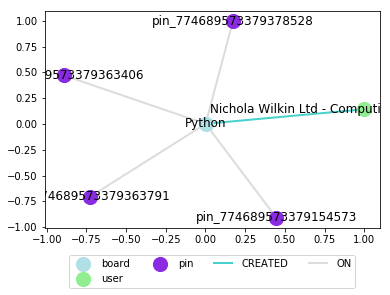

In [31]:
# Draw the graph using graphipy
color_set = set(mcolors.CSS4_COLORS)
options = {
    "node_label": "Label",
    "colorful_edges": True,
    "color_set": color_set
}
legend = exporter.draw_random(nx_graph, options=options, legend=plt)